In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_pickle("data/preprocess_data.pkl", compression="bz2")
df.head()

,review,sentiment,review_preprocessed
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [5]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.0 * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [12]:
freq_pos = len(df[df["sentiment"] == "positive"])
freq_neg = len(df[df["sentiment"] == "negative"])
data = [freq_pos, freq_neg]
labels = ["positive", "negative"]

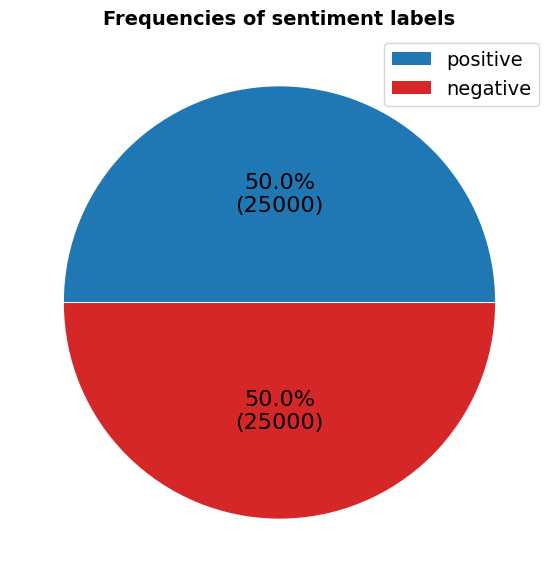

In [13]:
# Create pie chart
pie, ax = plt.subplots(figsize=[11, 7])

plt.pie(
    x=data,
    autopct=lambda pct: func(pct, data),
    explode=[0.0025] * 2,
    pctdistance=0.5,
    colors=[sns.color_palette()[0], "tab:red"],
    textprops={"fontsize": 16},
)

plt.title("Frequencies of sentiment labels", fontsize=14, fontweight="bold")
plt.legend(labels, loc="best", prop={"size": 14})
# pie.savefig("PieChart.png")
plt.show()

In [15]:
words_len = df["review_preprocessed"].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp["words length"] = words_len
df_temp.head()

,review,sentiment,review_preprocessed,words length
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...,162
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,84
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,84
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...,64
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,125


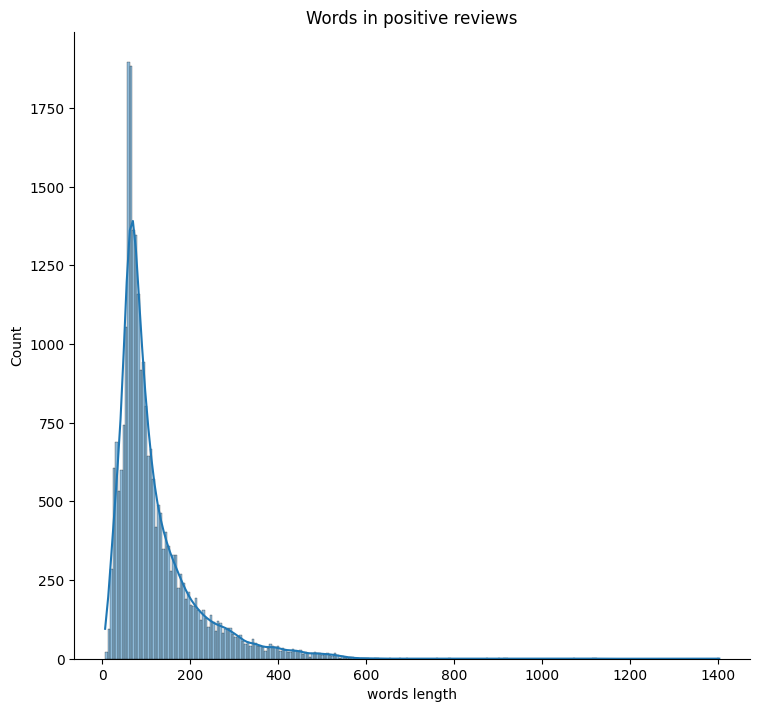

In [16]:
hist_positive = sns.displot(
    data=df_temp[df_temp["sentiment"] == "positive"],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False,
).set(title="Words in positive reviews")
plt.show(hist_positive)

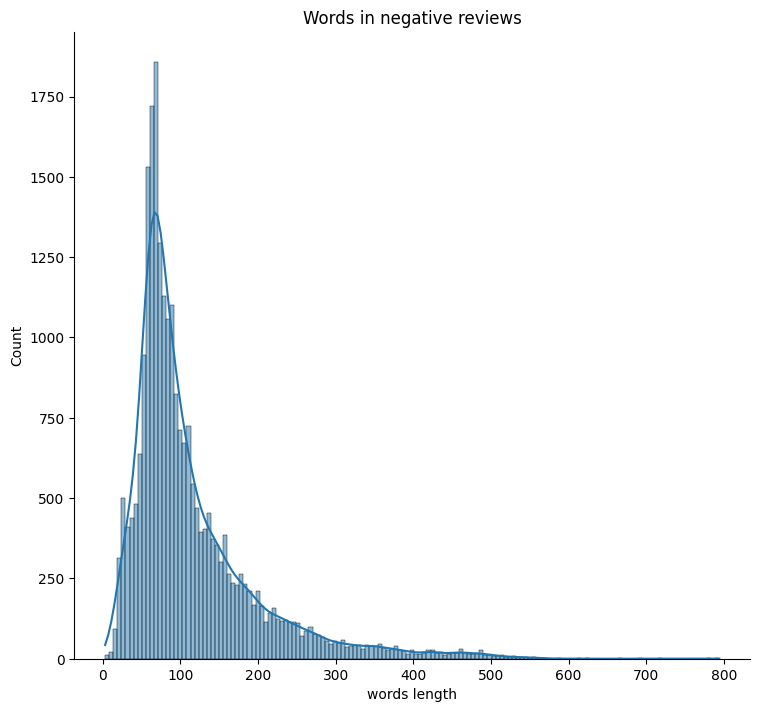

In [17]:
hist_negative = sns.displot(
    data=df_temp[df_temp["sentiment"] == "negative"],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False,
).set(title="Words in negative reviews")
plt.show(hist_negative)

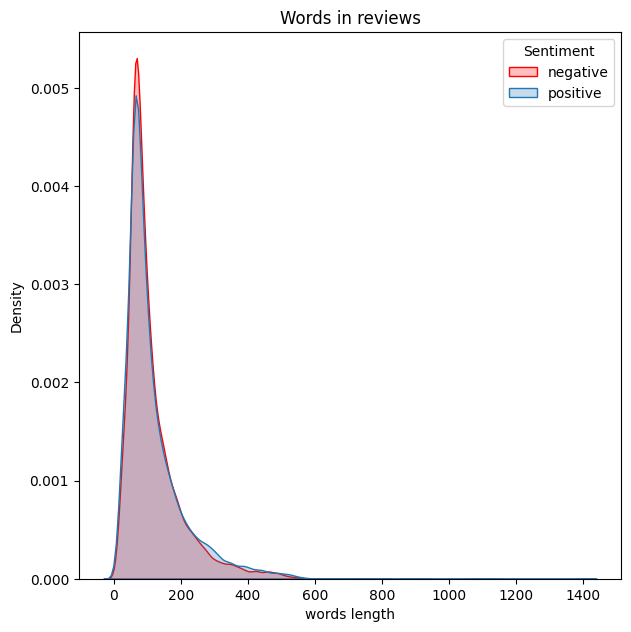

In [18]:
plt.figure(figsize=(7, 7.1))
kernel_distibution_number_words_plot = sns.kdeplot(
    data=df_temp,
    x="words length",
    hue="sentiment",
    fill=True,
    palette=[sns.color_palette()[0], "red"],
).set(title="Words in reviews")

plt.legend(title="Sentiment", labels=["negative", "positive"])
plt.show(kernel_distibution_number_words_plot)